In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#import MNIST data, load train and test data
from keras.datasets.mnist import load_data
(train_digits, train_labels), (test_digits, test_labels) = load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#define batch size, class, epochs, and image dimension
batch_size = 128
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28

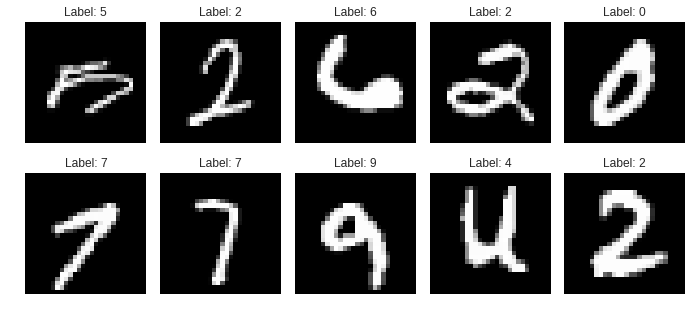

In [5]:
#display 10 random image of data
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(100)

#pick 10 image randomly from train_digits
rand_10 = np.random.randint(0, train_digits.shape[0],10) 
sample_digits = train_digits[rand_10] 
sample_labels = train_labels[rand_10]

#show sample in 2x5 format
num_rows, num_cols = 2, 5 
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.25}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('Label: %d' % sample_labels[image_index])
plt.show()

In [6]:
#pre-processing
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1 
print("img height:",image_height, " img width:",image_width," channels:",num_channels)

#reshape image data to 28x28 grayscale picture
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))
print("numbers of training data:",train_data.shape[0]," numbers of testing data:",test_data.shape[0])

# re-scale the image data so every pixels have values between (0.0,1.0]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

#one-hot encoding for 10 class
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

img height: 28  img width: 28  channels: 1
numbers of training data: 60000  numbers of testing data: 10000


((60000, 10), (10000, 10))

In [0]:
#shuffle train data
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

train_data = train_data[indexes]
train_labels_cat = train_labels_cat[indexes]

# take 10 percent data training for validation
val_perc = 0.10 
val_count = int(val_perc * len(train_data))

val_data = train_data[:val_count,:]
val_labels_cat = train_labels_cat[:val_count,:]
train_data2 = train_data[val_count:,:]
train_labels_cat2 = train_labels_cat[val_count:,:]

In [0]:
#CNN
model = Sequential()
#convolutional layer and pooling layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same" ,input_shape=(image_height, image_width, num_channels))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#output layer
model.add(Dense(num_classes, activation='softmax'))

#Optimizer & categorical_crossentropy loss function
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
#train the model
model2 = model.fit(train_data2, train_labels_cat2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(val_data, val_labels_cat))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 71s 1ms/step - loss: 0.0302 - acc: 0.9900 - val_loss: 0.0332 - val_acc: 0.9893
Epoch 2/10
54000/54000 [==============================] - 71s 1ms/step - loss: 0.0275 - acc: 0.9907 - val_loss: 0.0358 - val_acc: 0.9897
Epoch 3/10
54000/54000 [==============================] - 71s 1ms/step - loss: 0.0267 - acc: 0.9910 - val_loss: 0.0330 - val_acc: 0.9895
Epoch 4/10
54000/54000 [==============================] - 71s 1ms/step - loss: 0.0252 - acc: 0.9918 - val_loss: 0.0330 - val_acc: 0.9910
Epoch 5/10
54000/54000 [==============================] - 71s 1ms/step - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0367 - val_acc: 0.9908
Epoch 6/10
54000/54000 [==============================] - 71s 1ms/step - loss: 0.0211 - acc: 0.9929 - val_loss: 0.0381 - val_acc: 0.9897
Epoch 7/10
54000/54000 [==============================] - 71s 1ms/step - loss: 0.0221 - acc: 0.9923 - val_loss: 0.0333 - val_acc:

No handles with labels found to put in legend.


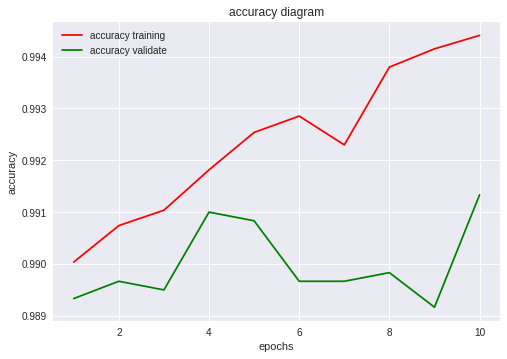

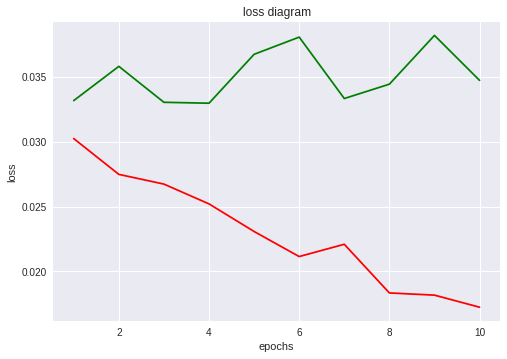

In [35]:
#graph
count10 = [1,2,3,4,5,6,7,8,9,10]

fig, plotacc = plt.subplots()
plotacc.set_title("accuracy diagram")
plotacc.set_xlabel("epochs")
plotacc.set_ylabel("accuracy")
plotacc.plot(count10, model2.history['acc'], color="red",label="accuracy training")
plotacc.plot(count10, model2.history['val_acc'], color="green",label="accuracy validate")
plotacc.legend(loc = "upper left") 


fig, plotloss = plt.subplots()
plotloss.set_title("loss diagram")
plotloss.set_xlabel("epochs")
plotloss.set_ylabel("loss")
plotloss.legend(loc = "upper left") 
plotloss.plot(count10, model2.history['loss'], color="red",label="loss training")
plotloss.plot(count10, model2.history['val_loss'], color="green",label="loss validate")



In [17]:
#testing the data
score = model.evaluate(test_data, test_labels_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022120834507804922
Test accuracy: 0.9935
